In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import svm
import pandas as pd

### Using SVM to predict quality of wine

In [2]:
# Dataset
dataset = pd.read_csv(r'C:\Users\User\Downloads\wineQualityReds.csv')

dataset.head(100)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,6,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,8,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,9,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,10,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Quality is dependant on all the other features, so lets plot all the relationship graphs to better visualise their correlationship

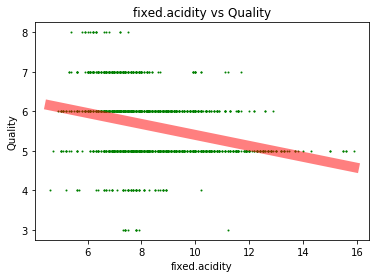

Correlation: -0.29889080532295115


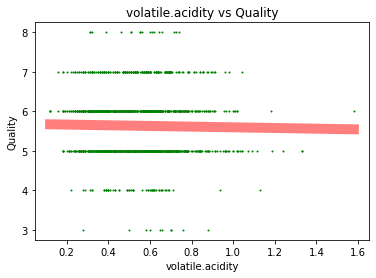

Correlation: -0.019121262581390307


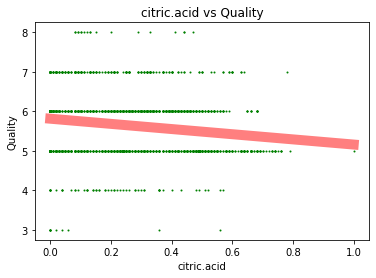

Correlation: -0.15789085570623182


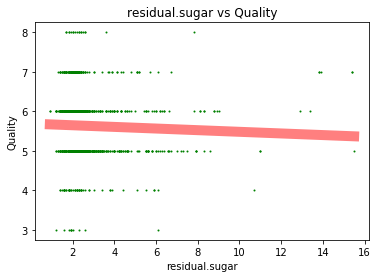

Correlation: -0.03614452492214718


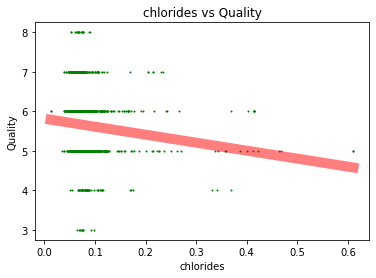

Correlation: -0.11779317717421409


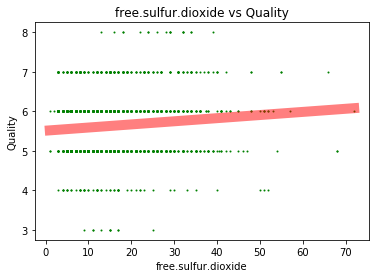

Correlation: 0.10250581466564189


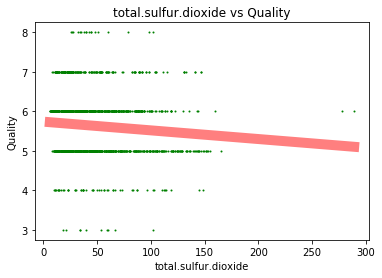

Correlation: -0.08962614383211621


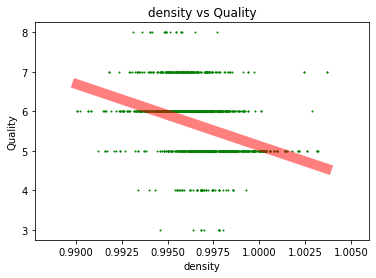

Correlation: -0.36626041781616314


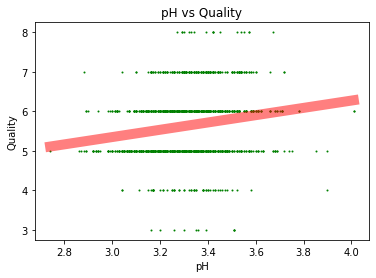

Correlation: 0.17656466238161267


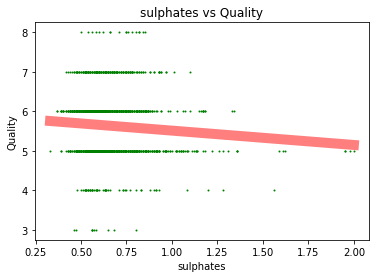

Correlation: -0.07628580731311636


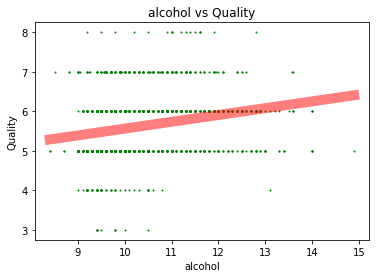

Correlation: 0.2272036669257379


In [3]:
for x in dataset.columns[1:-1]:
    quality = dataset['quality'].sort_values()
    xx = dataset[x].sort_values()
    
    plt.scatter(dataset[x], quality, s=1, alpha=1, c='green')
    
    fit = np.poly1d(np.polyfit(dataset[x], quality, 1))
    xx = np.linspace(min(dataset[x]),max(dataset[x]),100)
    yy = [fit(i) for i in xx]
    
    plt.plot(xx, yy, c='red', lw=10, alpha=0.5)
    
    plt.title(f'{x} vs Quality')
    
    plt.xlabel(str(x))
    plt.ylabel('Quality')
    
    plt.show()
    print(f'Correlation: {np.corrcoef(dataset[x], quality)[0][1]}')
    


We can see that they rarely form a strong correlationship with the quality, but all of them together might produce some results. Lets try with some prediction models to see if they work well together in predicting the quality.

In [4]:
# Make sure that any null values are replaced

for i in dataset.columns:
    dataset[i].fillna(np.mean(dataset[i]))
    print(i, '\nFilled all NaN values with mean of ',i,':',np.mean(dataset[i]),'.\n\n')

Unnamed: 0 
Filled all NaN values with mean of  Unnamed: 0 : 800.0 .


fixed.acidity 
Filled all NaN values with mean of  fixed.acidity : 8.31963727329581 .


volatile.acidity 
Filled all NaN values with mean of  volatile.acidity : 0.5278205128205128 .


citric.acid 
Filled all NaN values with mean of  citric.acid : 0.2709756097560976 .


residual.sugar 
Filled all NaN values with mean of  residual.sugar : 2.53880550343965 .


chlorides 
Filled all NaN values with mean of  chlorides : 0.08746654158849279 .


free.sulfur.dioxide 
Filled all NaN values with mean of  free.sulfur.dioxide : 15.874921826141339 .


total.sulfur.dioxide 
Filled all NaN values with mean of  total.sulfur.dioxide : 46.46779237023139 .


density 
Filled all NaN values with mean of  density : 0.996746679174484 .


pH 
Filled all NaN values with mean of  pH : 3.3111131957473416 .


sulphates 
Filled all NaN values with mean of  sulphates : 0.6581488430268917 .


alcohol 
Filled all NaN values with mean of  alcohol :

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Get rid of unsuitable subsets
x_ = pd.DataFrame(dataset.drop(columns='quality')).head(120)
x_ = pd.DataFrame(x_.drop(columns='Unnamed: 0'))

y_ = dataset['quality'].head(120)


x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size=0.4, shuffle=False)

In [7]:
# Testing best model to fit this data with

c = [1,10,100]
kernels = ['linear','poly','rbf']

for c_ in c:
    for k_ in kernels:
        model = svm.SVC(C=c_,kernel=k_,gamma='auto').fit(x_train,y_train)
        score = model.score(x_test, y_test)
        print(f'C value of {c_}, \nKernel: {k_}, Score={score}')

C value of 1, 
Kernel: linear, Score=0.625
C value of 1, 
Kernel: poly, Score=0.625
C value of 1, 
Kernel: rbf, Score=0.5833333333333334
C value of 10, 
Kernel: linear, Score=0.6458333333333334
C value of 10, 
Kernel: poly, Score=0.625
C value of 10, 
Kernel: rbf, Score=0.5625
C value of 100, 
Kernel: linear, Score=0.625
C value of 100, 
Kernel: poly, Score=0.625
C value of 100, 
Kernel: rbf, Score=0.5625


In [8]:
# We will use C-value of 1, linear kernel, with score of 0.625.
model = svm.SVC(gamma='auto',C=1,kernel='linear').fit(x_train,y_train)

In [9]:
# now try to predict quality

# There are many variables that affect quality:
labels = [i for i in dataset.columns]

labelss = []
for x in labels:
    if labels.index(x)==0 or labels.index(x)==len(labels):
        print('Removed ',x)
    else:
        labelss.append(x)
labels = labelss
        
print(labels[:-1])

# Only from index 1 to 2nd last we will use, so the input has to have:
inputt = []


choice = int(input('\n\nDo you want to paste formatted features or type manually? (0/1)  '))

if choice==0:
    inputted = (input('Paste Features  '))
    inputt.append(eval(inputted))
elif choice==1:
    for x in labels[:-1]:
        inputted = input(f'Key in {x}  (Ranging from {dataset[x].min()} to {dataset[x].max()})  ')
        if not dataset[x].min() < float(inputted) < dataset[x].max():
            print('\033[93m Warning: Inappropriate Value. May interfere with results \033[0m')
        else:
            print('\033[92m Success! \033[0m')
        
        inputt.append(inputted)

Removed  Unnamed: 0
['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Do you want to paste formatted features or type manually? (0/1)  1
Key in fixed.acidity  (Ranging from 4.6 to 15.9)  5
 Success! 
Key in volatile.acidity  (Ranging from 0.12 to 1.58)  0.15
 Success! 
Key in citric.acid  (Ranging from 0.0 to 1.0)  0.7
 Success! 
Key in residual.sugar  (Ranging from 0.9 to 15.5)  15
 Success! 
Key in chlorides  (Ranging from 0.012 to 0.611)  0.013
 Success! 
Key in free.sulfur.dioxide  (Ranging from 1.0 to 72.0)  11.5
 Success! 
Key in total.sulfur.dioxide  (Ranging from 6.0 to 289.0)  280
 Success! 
Key in density  (Ranging from 0.9900700000000001 to 1.00369)  1
 Success! 
Key in pH  (Ranging from 2.74 to 4.01)  4.001
 Success! 
Key in sulphates  (Ranging from 0.33 to 2.0)  1
 Success! 
Key in alcohol  (Ranging from 8.4 to 14.9)  8.3


In [10]:
# Final Prediction
print('When',inputt,'\nQuality is: ',(model.predict(np.array(inputt).reshape(-1,11))[0]))

When ['5', '0.15', '0.7', '15', '0.013', '11.5', '280', '1', '4.001', '1', '8.3'] 
Quality is:  5


In [15]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.7083333333333334
0.625


Relatively high score for this prediction model for both test and training data. May not be very viable as range of quality is very small, an inaccurate prediction may err wildly from the expected value.